#  Tensors 

### Geodesics
   
This is easily derived from the Euler-Lagrange equation, (see Calculus of Variations notebook in Lagrangian subfolder) and represents the line between two points that minimizes the intrinsic distance. 

> The notion of intrinsic distance means the distance *under* the metric, or to minimize the variation in coordinates on the path between two points.
   
To repeat example 2 in the notebook, The solution to minimizing the distance between two points was the differential equation 
   
$$ y'' = 0 $$
   
and this leads to the equation of a line after two successive integrations $y = mx+ c$, so clearly a simple and easy way to compute a geodesic on a surface (in some cases) may be to substitute the surface variables in place of $x$ and $y$...

For example in the 2d space, $x = uv,\quad y = \frac{1}{2}(u^2 - v^2)$ the equation of the lines $u=m_1 v + c_1$ and $v = m_2 u + c_1$ where $m_1$ and $m_2$ are just arbitrary gradients and $c_1$ and $c_2$ are arbitrary constants to be chosen, allows us to create curvilinear triangles that minimize $u$ and $v$ between two points ...

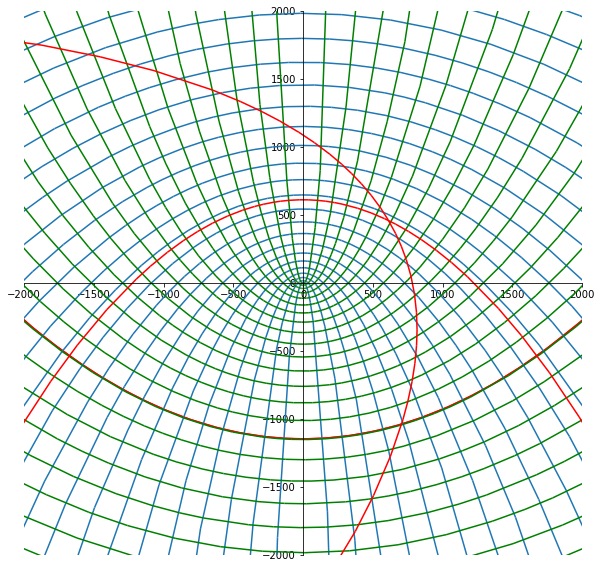

In [129]:
from sympy.plotting import plot_parametric, plot3d
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 10, 10

u,v = symbols('u,v')
g,ux,uz,t= symbols('g, ux,uz,t')

z_=((g/2)*(t+uz/g)**2)-1/(2*g)
x_=ux*(t+uz/g)
z_ = (g/(2*ux**2))*x_**2  -ux**2/(2*g)

u_pow2 = sqrt( x_**2 + z_**2 ) + z_
v_pow2 = sqrt( x_**2 + z_**2 ) - z_
u_1= sqrt(u_pow2.subs({t:0,ux:sqrt(2),uz:150,g:-9.81}))
u_2= sqrt(u_pow2.subs({t:25,ux:sqrt(2),uz:150,g:-9.81}))
v_1= sqrt(v_pow2.subs({t:0,ux:sqrt(2),uz:150,g:-9.81}))
v_2= sqrt(v_pow2.subs({t:25,ux:sqrt(2),uz:150,g:-9.81}))

scaled_arcLen =N(  (integrate(sqrt(u_1**2 + v**2),(v,0,v_1)) +integrate(sqrt(u_1**2 + v**2),(v,0,v_2))))
p1=plot_parametric(x_.subs({ux:150,uz:150,g:-9.81}),-z_.subs({ux:150,uz:150,g:-9.81}), (t,0,35),xlim=(-2000,2000),ylim=(-2000,2000),show=False, line_color='r')
p1.extend(plot_parametric((47.8913142610576*(u),0.5*((u)**2 - 47.8913142610576**2)),(u,-2800,2800),show=False, line_color='r'))
for a in range(1,25):
    v = 3*a#sqrt(50*2*a)
    p1.extend(plot_parametric((u*v,0.5*(v**2-u**2)),(u,-2800,2800),show=False))
    

for a in range(1,25):
    #p = 
    v=3*a
    p1.extend(plot_parametric((u*(v),0.5*(u**2-(v)**2)),(u,-2800,2800),show=False, line_color='g'))

  
p1.extend( plot_parametric((u*(-1.5*(u) - 70),0.5*(u**2-(-1.5*(u) - 70)**2)),(u,-2800,2800),show=False, line_color='r'))   
p1.extend(plot_parametric((35)*(u),0.5*(((35)**2)-(u)**2 ),(u,-2800,2800),show=False, line_color='r'))
p1.show()

Two of the red curves run along parameter lines, and are either $u=[\text{const}]$ or $v=[\text{const}]$, the other red line connects two points on the lines with an arc, representing the distance that minimizes the distance in $u$ and $v$ ( and not in $x$ and $y$ ). This distance is $s (u,v) = \sqrt{u^2 + v^2} $ and is a curvlinear version of the pythagorean theorom. Using the metric would give us the distance in rectangular coordinates, but that would not be a geodesic.
   
Geodesics on a sphere are simply the curves between two ponits, if two points are on the equator of the earth, then a geodesic between them would travel along the equator. In fact you could rotate the sphere to be oriented such that the two points are flat on the $xz$ plane then simply claim that the geodesic is the new equator.



### Parallel Transport
   
Is the act of transporting a vector around a loop in space such that the vector is always held parallel to its previous position. 

> The vector is in tangent space.
   
Sometimes the total derivative is written with a notation that suggests a directional derivative with respect to the tangent "pointing along the line"

$$ \frac{\delta \mathbf V}{\delta t} = \nabla_U \mathbf V$$
   
where $U = \frac{\partial x^i}{dt}$ is the tangent along the curve $\mathbf x(t)$. The equation for parallel transport of a vector takes the form
   
$$\frac{\partial \mathbf V^i}{\partial \lambda} + \Gamma^i_{pr}\mathbf V^p \frac{dx^r}{d\lambda}=0$$
   
This is extended in the next section using the tangent $V^i = \frac{\partial \mathbf x^i}{\partial \lambda}$ of the curve $\mathbf x = \mathbf x(\lambda)$ where $\lambda$ is some
arbitrary allowable parameter.
   


In [130]:
omega,t = symbols('omega,t')
rot_mat_z = Matrix([[cos(omega*t), -sin(omega*t),0],
                    [sin(omega*t), cos(omega*t),0],
                    [0,0,1]])

rot_mat_x = Matrix([[1,0,0],
                    [0,cos(omega*t), -sin(omega*t)],
                    [0,sin(omega*t), cos(omega*t)]
                    ])

rot_mat_y = Matrix([
                    [cos(omega*t),0, sin(omega*t)],
                    [0,1,0],
                    [-sin(omega*t),0, cos(omega*t)]
                    ])

r_mat = Matrix([[1, 0,0],
                    [0,1,0],
                    [0,0,1]])

# create vector that transforms from cylindrical coordinates to cartesian
r = rho1*sin(theta1)*cos(phi)*e.i + rho1*sin(theta1)*sin(phi)*e.j + rho1*cos(theta1)*e.k

# differentiate the vector,
dr_rho = diff(r,rho1)
dr_theta = diff(r,theta1)
dr_phi = diff(r,phi)

# compute the coordinate vectors,  forming e_1 = (dr/du_1)/|dr/du_1|, etc
E1 = dr_rho / dr_rho.magnitude()
E2 = dr_theta / dr_theta.magnitude()
E3 = dr_phi / dr_phi.magnitude()

PI = N(pi)
theta_angle = PI/2
phi_angle = 0
radius = 2

# matrix for matrix multilication
r_vec = Matrix([P1.dot(e.i),P1.dot(e.j),P1.dot(e.k)])

If we start on the equator at point A, transport w in parallel to itself along the equator following the red frame to point B,
then go up to the north pole at point C and follow the blue frame downwards, we arrive and w no longer points
in the same direction


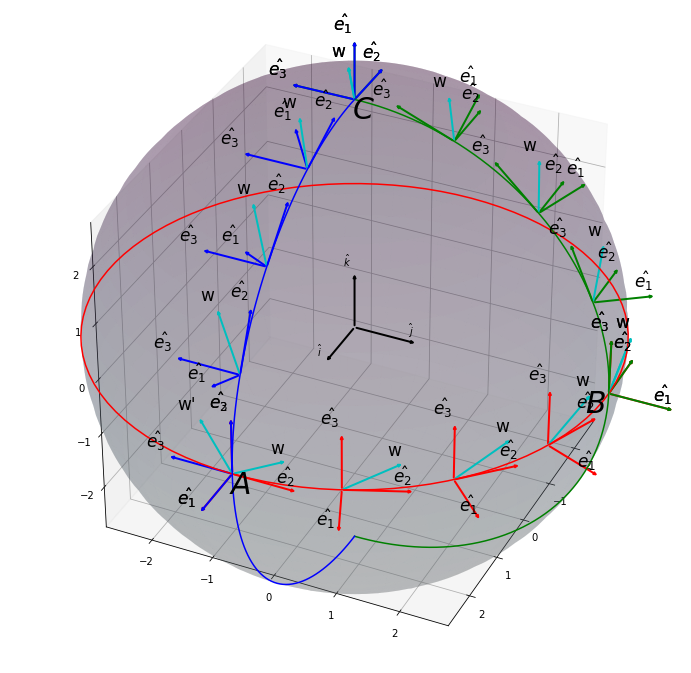

In [131]:
def matrix_from_vector2(v1,v2,v3):
    return Matrix([[v1.dot(e.i),v1.dot(e.j),v1.dot(e.k)],
                   [v2.dot(e.i),v2.dot(e.j),v2.dot(e.k)],
                   [v3.dot(e.i),v3.dot(e.j),v3.dot(e.k)]])

def vector_from_matrix(v,i):
    return v[0]*e.i + v[1]*e.j + v[2] * e.k

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')

PlotBasisCartesian()

zero_vec = 0*e.i+0*e.j+0*e.k

radius = 4
PI = N(pi)
thet = PI/2
ph = 0
rad = 2
# identity matrix to perform the transforms on
mat_basis = Matrix([[1,0,0],[0,1,0],[0,0,1]])
P1 =   r.subs( {rho1:rad, theta1:thet, phi:ph })
E1_1 = E1.subs({rho1:rad, theta1:thet, phi:ph })
E2_1 = E3.subs({rho1:rad, theta1:thet, phi:ph })
E3_1 = E2.subs({rho1:rad, theta1:thet, phi:ph })
    
    # create a basis matrix from the vectors and transform unit vectors 
    # to obtain the child frame basis
r_mat = Matrix([P1.dot(e.i),P1.dot(e.j),P1.dot(e.k)])
# starting values
r_mat_new = r_mat
r_vec_new = r_mat
for i in range(0,5):
    
    r_mat_new = rot_mat_z * mat_basis 
    r_vec_new = rot_mat_z * r_mat 
    r_mat_new = r_mat_new.subs({omega:PI/8, t:i})
    r_vec_new = r_vec_new.subs({omega:PI/8, t:i})
    rad = sqrt(r_vec_new[0]**2+r_vec_new[1]**2+r_vec_new[2]**2)
    thet = acos( r_vec_new[2]/rad)
    ph = atan(r_vec_new[1]/r_vec_new[0])        
    
    # create the basis
    P1 =   r.subs( {rho1:rad, theta1:thet, phi:ph })
    E1_1 = E1.subs({rho1:rad, theta1:thet, phi:ph })
    E2_1 = E3.subs({rho1:rad, theta1:thet, phi:ph })
    E3_1 = E2.subs({rho1:rad, theta1:thet, phi:ph })
    
    # create a basis matrix from the vectors and transform unit vectors 
    # to obtain the child frame basis
    matrix_basis =  matrix_from_vector2(E1_1,E2_1,E3_1)
    E_11 = vector_from_matrix( r_mat_new * Matrix([1,0,0]), 0 )
    E_12 =  vector_from_matrix(r_mat_new * Matrix([0,1,0]), 0)
    E_13 =  vector_from_matrix(r_mat_new * Matrix([0,0,1]),0)
    
    plot_basis(radius*E1_1, E_11, E_12, E_13, e, "r")
    plot_arrow( radius*E1_1,0.85*E_12 + 0.5 *E_13,e, "w", "c")
    
mat_basis = r_mat_new
new_start = r_vec_new 
for i in range(0,5):
    
    r_mat_new = rot_mat_x * mat_basis 
    r_vec_new = rot_mat_x * new_start 
    r_mat_new = r_mat_new.subs({omega:PI/8, t:i})
    r_vec_new = r_vec_new.subs({omega:PI/8, t:i})
    
    # work out the radius, angles, etc
    rad = sqrt(r_vec_new[0]**2+r_vec_new[1]**2+r_vec_new[2]**2)
    thet = acos( r_vec_new[2]/rad)
    ph = atan(r_vec_new[1]/r_vec_new[0])        
    
    # create the basis
    P1 =   r.subs( {rho1:rad, theta1:thet, phi:ph })
    E1_1 = E1.subs({rho1:rad, theta1:thet, phi:ph })
    E2_1 = E3.subs({rho1:rad, theta1:thet, phi:ph })
    E3_1 = E2.subs({rho1:rad, theta1:thet, phi:ph })
    
    # create a basis matrix from the vectors and transform unit vectors 
    # to obtain the child frame basis
    matrix_basis =  matrix_from_vector2(E1_1,E2_1,E3_1)# Matrix([[E1_1],[E2_1],[E3_1]])
    E_11 = vector_from_matrix( r_mat_new * Matrix([1,0,0]), 0 )
    E_12 =  vector_from_matrix(r_mat_new * Matrix([0,1,0]), 0)
    E_13 =  vector_from_matrix(r_mat_new * Matrix([0,0,1]),0)
    
    plot_basis(radius*E1_1, E_11, E_12, E_13, e, "g")    
    plot_arrow( radius*E1_1,0.85*E_12 + 0.5 *E_13,e, "w", "c")
    
mat_basis = r_mat_new
new_start = r_vec_new 
for i in range(0,5):
    
    r_mat_new = rot_mat_y * mat_basis 
    r_vec_new = rot_mat_y * new_start 
    
    r_mat_new = r_mat_new.subs({omega:PI/8, t:i})
    r_vec_new = r_vec_new.subs({omega:PI/8, t:i})

    rad = sqrt(r_vec_new[0]**2+r_vec_new[1]**2+r_vec_new[2]**2)
    thet = acos( r_vec_new[2]/rad)
    ph = atan(r_vec_new[1]/r_vec_new[0])        
    
    P1 =   r.subs( {rho1:rad, theta1:thet, phi:ph })
    E1_1 = E1.subs({rho1:rad, theta1:thet, phi:ph })
    E2_1 = E3.subs({rho1:rad, theta1:thet, phi:ph })
    E3_1 = E2.subs({rho1:rad, theta1:thet, phi:ph })
    
    
    matrix_basis =  matrix_from_vector2(E1_1,E2_1,E3_1)# Matrix([[E1_1],[E2_1],[E3_1]])
    E_11 = vector_from_matrix( r_mat_new * Matrix([1,0,0]), 0 )
    E_12 =  vector_from_matrix(r_mat_new * Matrix([0,1,0]), 0)
    E_13 =  vector_from_matrix(r_mat_new * Matrix([0,0,1]),0)
    
    plot_basis(radius*E1_1, E_11, E_12, E_13, e, "b")    
    if i == 4:
        plot_arrow( radius*E1_1,0.85*E_12 + 0.5 *E_13,e, "w\'", "c")
    else:
        plot_arrow( radius*E1_1,0.85*E_12 + 0.5 *E_13,e, "w", "c")



# draw arcs and sphere    
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = radius * np.outer(np.cos(u), np.sin(v))
y = radius * np.outer(np.sin(u), np.sin(v))
z = radius * np.outer(np.ones(np.size(u)), np.cos(v))

#ls = LightSource(azdeg=100, altdeg=45)
ax.plot_surface(x, y, z, rstride =3,
    cstride = 3, color ='k',alpha=0.125, linewidth=0,cmap=plt.get_cmap('BuPu'))
ax.plot_surface(x, y, z, rstride =3,
    cstride = 3, color ='k',alpha=0.125, linewidth=0)

# draw x,y plane circle at z=0
cx = radius*np.cos(u)
cy = radius*np.sin(u)
cz = 0
ax.plot(cx, cy, cz, color='r')

# draw arc from phi=0 to phi=pi
cx = radius*np.cos(np.pi/2)*np.sin(v)
cy = radius*np.sin(np.pi/2)*np.sin(v)
cz = radius*np.cos(v)
ax.plot(cx, cy, cz, color='g')

# draw arc from phi=0 to phi=pi
cx = radius*np.cos(0)*np.sin(v)
cy = radius*np.sin(0)*np.sin(v)
cz = radius*np.cos(v)
ax.plot(cx, cy, cz, color='b')

ax.set_xlim(-2.65, 2.65)
ax.set_ylim(-2.65, 2.65)
ax.set_zlim(-2.65, 2.65)

#
annotate3D(ax, r'$ A $', xyz=(radius,0,0), fontsize=30, xytext=(-3,4),
               textcoords='offset points', ha='left',va='top') 
annotate3D(ax, r'$ B $', xyz=(0,radius,0), fontsize=30, xytext=(-3,4),
               textcoords='offset points', ha='right',va='top') 
annotate3D(ax, r'$ C $', xyz=(0,0,radius), fontsize=30, xytext=(-3,4),
               textcoords='offset points', ha='left',va='top') 
ax.view_init(35, 25)
print "If we start on the equator at point A, transport w in parallel to itself along the equator following the red frame to point B," 
print "then go up to the north pole at point C and follow the blue frame downwards, we arrive and w no longer points"
print "in the same direction"

plt.show()



### Note:
   
> Imagine you are carrying a bag of curry in a backpack while you are riding a bicycle - if you can't keep the curry upright the bag will tip over inside the backpack, therefore it is imperitive to have a concept of up and down relative to the interior of the backpack during your journey. 
   
> The notion of parallel transport ensures that the mathematical notion of directions and locations are preserved through the space, in the case of general relativity this direction could be the direction vector to a source of a gravitational field.

### Generalized Geodesics 
   
The equation for acceleration with arc length instead of time is ...
  
$$ b^i =\frac{\partial^2 x^i}{\partial s^2}  + \Gamma^i_{qr}  \frac{\partial x^q}{\partial s}\frac{\partial x^r}{\partial s}$$

If a vector $\mathbf V$ is parallel transported along a line, then 
   
$$ \frac{\delta \mathbf V}{\delta t}=0$$
   
A straight line (in curved space) is a curve that parallel transports its tangent vector. 
   
$$b^i =\frac{\partial^2 x^i}{\partial s^2}  + \Gamma^i_{qr}  \frac{\partial x^q}{\partial s}\frac{\partial x^r}{\partial s} = 0$$
   
so a geodesic is given by the solutions $x^i = x^i(s)$ to the system of equations $b^i = 0$ as defined above. (for positive definite metrics).

and from this, the intrinsic (or Frenet-Serret?) curvature is 
   
$$\kappa(s) = \sqrt{\left|g_{ij}b^i b^j\right|}$$
   
Intrinsic curvature is the instantaneous rate of change of angle between the tangent vector to a curve and another vector in the tangent space that is parallel transported along the curve. The concept of parallel refers to a generalization of Euclidean parallelism. The vector $b^i$ is also known as the intrinsic curvature vector.
  
Therefore 
   
$$\kappa(s) = 0 $$
   
is another requirement that a curve is a geodesic. If $\kappa(s)=0$ everywhere along a curve, then the curve is a geodesic, but not neccessarily the shortest distance between two points, i.e. the arc around the equator of a sphere that connects two points is a geodesic, but if the points are not at exactly opposite sides of the sphere then there exists another geodesic connecting them that may or may not be a shorter distance.
   
In addition to this, a curve in a surface is a geodesic if the principle normal $\mathbf N$ coincides with the surface normal $\mathbf n$ at every point on the curve.

### Generalization of the second fundamental form...
   
The second fundamental form can be generalized to higher dimensional spaces too, The coefficients of the second fundamental form for a surface $\mathbf r(u^i)$ can be written   
   
$$ b_{\alpha\beta} = r^i_{\alpha\beta} n_i $$
   
where the second fundamental form is    
   
$$ \mathrm{II} = b_{\alpha\beta} d u^\alpha du^\beta $$
   
Of course the problem of computing the coefficients from the normal vector is that the normal vector is not so easily defined for a hyper surface, since a surface in 3 dimensional space $\mathbf r(u,v)$ has a normal vector defined everywhere on the surface, but this produces a matrix of dimension 2. The hyper surface $\mathbf r(u^1,u^2, u^3)$ is a coordinate system embedded in a higher dimensional space. 
   
### Reimann Tensor
   
The Reimann tensor can be defined unintuitively by the second fundamental form
   
$$ R_{ijkl} = b_{jl}b_{ki}-b_{jk}b_{li}$$
   
> Note: In triply orthogonal systems, the fundamental coefficients $F$ and $M$ are both zero. (Gray Modern Differential Geometry '98) Also note -> the curves of intersection of the surfaces of a triply orthogonal patch will be the principle curves of the surfaces (Dupin's theorem).  

And the Riemann tensor of the second kind
   
$$ R^h_{ijk} = g^{ah}R_{hijk}$$
   
And thanks to Gauss' theorem egregium this can be expressed in terms of the first fundamental form and its derivatives,
   
$$ R^{\alpha}_{ijk} = \frac{\partial}{\partial u^j}\Gamma^{\alpha}_{ik} - \frac{\partial}{\partial u^k}\Gamma^{\alpha}_{ij} + \Gamma^{\alpha}_{\beta j}\Gamma^{\beta}_{ik} - \Gamma^{\alpha}_{\beta k}\Gamma^{\beta}_{ij}$$
   
And thus it generalizes to higher dimensional spaces.

why is this true ?
   


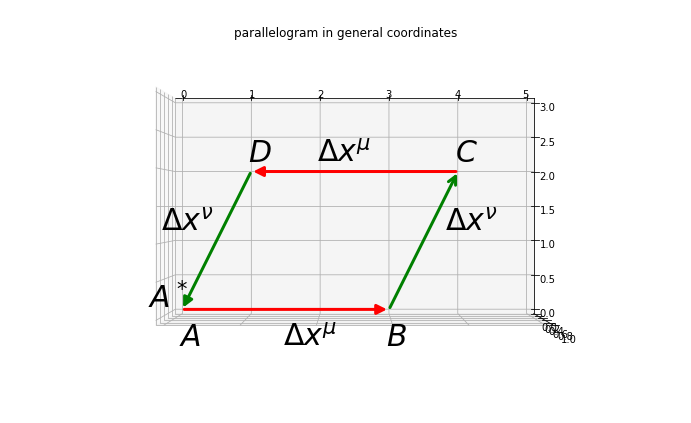

In [132]:
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')
ax.set_aspect('equal')

#proj3d.persp_transformation = orthogonal_proj
a = Arrow3D([0, 3], [0, 0], [0, 0], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
ax.add_artist(a)
a = Arrow3D([1, 0], [2, 0], [0, 0], mutation_scale=20, lw=3, arrowstyle="-|>", color="g")
ax.add_artist(a)
a = Arrow3D([3, 4], [0, 2], [0, 0], mutation_scale=20, lw=3, arrowstyle="->", color="g")
ax.add_artist(a)
a = Arrow3D([4, 1], [2, 2], [0, 0], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
ax.add_artist(a)

# points
annotate3D(ax, r'$ A $', xyz=(0,-0.25,0), fontsize=30, xytext=(-3,4),
               textcoords='offset points', ha='left',va='top') 
annotate3D(ax, r'$ B $', xyz=(3,-0.25,0), fontsize=30, xytext=(-3,4),
               textcoords='offset points', ha='left',va='top')
annotate3D(ax, r'$ C $', xyz=(4,2,0), fontsize=30, xytext=(-3,4),
               textcoords='offset points', ha='left',va='bottom')
annotate3D(ax, r'$ D $', xyz=(1,2,0), fontsize=30, xytext=(-3,4),
               textcoords='offset points', ha='left',va='bottom')
annotate3D(ax, r'$ A^*$', xyz=(-0.45,0.35,0), fontsize=30, xytext=(-3,4),
               textcoords='offset points', ha='left',va='top')

# infinitesimal lengths
annotate3D(ax, r'$ \Delta x^{\mu} $', xyz=(1.5,-0.25,0), fontsize=30, xytext=(-3,4),
               textcoords='offset points', ha='left',va='top') 
annotate3D(ax, r'$ \Delta x^{\mu} $', xyz=(2,2,0), fontsize=30, xytext=(-3,4),
               textcoords='offset points', ha='left',va='bottom') 
annotate3D(ax, r'$ \Delta x^{\nu} $', xyz=(3.85,1,0), fontsize=30, xytext=(-3,4),
               textcoords='offset points', ha='left',va='bottom')
annotate3D(ax, r'$ \Delta x^{\nu} $', xyz=(0.5,1,0), fontsize=30, xytext=(-3,4),
               textcoords='offset points', ha='right',va='bottom')

ax.set_xlim(0, 5)
ax.set_ylim(0, 3)
ax.set_zlim(0, 1)

ax.view_init(90, 270)

plt.title('parallelogram in general coordinates')

take a vector $V_A$ defined at the point A then parallel transport the vector around the parallogram to point $A^*$, then the  change in $V$ along the length $\Delta x^\mu$ from A to B is $(V_B-V_A)$ and the  change in $V$ along the length $x^\mu$ from C to D is $(V_D-V_C) = -(V_C-V_D)$ then
   
$$ \Delta V (x^\mu)= (V_B-V_A)+(V_D-V_C) = (V_B-V_A)-(V_C-V_D) $$
   
Since $(V_B-V_A)$ is the vector from A and B and  $(V_D-V_C)$ is the vector from C to D and for the vertical component

$$ \Delta V (x^\nu)= (V_B-V_C)+(V_D-V_{A^*}) = (V_B-V_C)-(V_{A^*}-V_D) $$

and the change in the vector $V$ after the total journey around the closed loop under parallel transport is 
   
$$\begin{array}{rcl}
 \Delta V (x^\mu)  -  \Delta V (x^\nu)&	=	&	((V_B-V_A)-(V_C-V_D)) - ((V_B-V_C)-(V_{A^*}-V_D))       \\
	&	=	&	V_B-V_A-V_C+V_D -V_B+V_C+V_{A^*}-V_D     \\
	&	=	&	V_{A^*} -V_A    	 	 	 	
\end{array}$$

and so for the vector to be parallel, $V_{A^*} $ should equal $V_A$.

Now, the distance between B and A is $(B-A)=\Delta x^\mu$, and the difference between the vector at these positions is a vector $\Delta V_{BA} = V_B-V_A$, these form a derivative as a difference quotient 
   
$$ \frac{\Delta V_{BA}}{\Delta x^\mu} = \frac{V_B-V_A}{B-A} \implies V_B-V_A = \frac{\Delta V_{BA}}{\Delta x^\mu} \Delta x^\mu$$

> the difference quotient is $\frac{f(b)-f(a)}{b-a}$ so here the vector is a function of position $V_B = V(B)$ etc. This is also called the mean value theorem.

And then in the limit as $\Delta x^\mu \to 0$ this becomes the derivative, however here we use the *covariant derivative* because the parallogram is defined in general coordinates 
   
$$lim_{\Delta x^\mu \to 0} \left(V_B-V_A\right) = \nabla_\mu V_{BA}  dx^\mu$$

Therefore
   
$$ (V_B-V_A) - (V_C-V_D)= \frac{\nabla_\mu V_{BA}   - \nabla_\mu V_{CD}  }{\Delta x^\nu} d x^\mu \Delta x^\nu$$

And again taking the limit, we have the covariant 2nd derivative
   
$$lim_{\Delta x^\nu \to 0}((V_B-V_A) - (V_C-V_D)) = \nabla_\nu \left(\nabla_\mu V\right) dx^\mu dx^\nu  $$

and the expression for the vertical component is simply the same but with $\mu$ and $\nu$ interchanged. The covariant derivative operator does not neccessarily commute, so for the complete parallel transport, 

$$\begin{array}{rcl}
 \Delta V (x^\mu)  -  \Delta V (x^\nu)&	=	&	((V_B-V_A)-(V_C-V_D)) - ((V_B-V_C)-(V_{A^*}-V_D))       \\
	&	=	&	\nabla_\nu \left(\nabla_\mu V\right) dx^\mu dx^\nu - \nabla_\mu \left(\nabla_\nu V\right) dx^\mu dx^\nu     \\
	&	=	&	dx^\mu dx^\nu \left(\nabla_\nu \left(\nabla_\mu V\right) - \nabla_\mu \left(\nabla_\nu V\right)\right)   \\ 	 	 	 	
    	&	=	&	dx^\mu dx^\nu \left[\nabla_\nu, \nabla_\mu \right] V
\end{array}$$

where $\left[\nabla_\nu, \nabla_\mu \right] V = \left(\nabla_\nu \nabla_\mu - \nabla_\mu \nabla_\nu\right) V$ is the commutator operator applied to $V$ . (or the Lie bracket/derivative of these two covariant derivatives)
To evaluate the commutator you first apply the right hand operator to the vector, then the left hand operator "operates" on the result, then you subtract the left hand operator applied to the vector, then the right hand operator operates on that result ...
   
$$\left[\nabla_\nu, \nabla_\mu \right] V = \left(\nabla_\nu \left(\nabla_\mu V\right) - \nabla_\mu \left(\nabla_\nu V\right)\right)$$

now $\nabla_\nu = \partial_\nu + \Gamma_\nu $ is a convenient abreviation for the covariant derivative, where $\partial_\nu = \frac{\partial}{\partial x^\nu}$ is the ordinary differentiation operator for partial derivatives so the commutator is (to be see as *acting on* the vector $V$ ):
   




$$\begin{array}{rcl}
\left[\nabla_\nu, \nabla_\mu \right]&	=	&	\left(\partial_\nu + \Gamma_\nu\right)\left(\partial_\mu + \Gamma_\mu \right)-\left(\partial_\mu + \Gamma_\mu \right)\left(\partial_\nu + \Gamma_\nu\right)       \\
	&	=	&	\left(\partial_\nu \partial_\mu + \partial_\nu\Gamma_\mu + \Gamma_\nu\partial_\mu +\Gamma_\nu\Gamma_\mu\right)-\left( \partial_\mu \partial_\nu + \partial_\mu\Gamma_\nu + \Gamma_\mu\partial_\nu +\Gamma_\mu\Gamma_\nu\right)    \\ 
    	&	=	&	\left( \partial_\nu \partial_\mu-\partial_\mu \partial_\nu \right) + \left(\partial_\nu\Gamma_\mu - \Gamma_\mu\partial_\nu\right) + \left(\Gamma_\nu\partial_\mu - \partial_\mu\Gamma_\nu\right) +\left(\Gamma_\nu\Gamma_\mu  -\Gamma_\mu\Gamma_\nu\right)    \\  
\end{array}$$

After expanding this, we notice that the the terms form back into commutators


$$\begin{array}{rcl}
\left[\nabla_\nu, \nabla_\mu \right]&	=	&	[\partial_\nu, \partial_\mu] + [\partial_\nu,\Gamma_\mu] + [\Gamma_\nu,\partial_\mu] +[\Gamma_\nu,\Gamma_\mu]    \\
    	&	=	&		 [\partial_\nu,\Gamma_\mu] + [\Gamma_\nu,\partial_\mu] +[\Gamma_\nu,\Gamma_\mu] \\
    	&	=	&	\partial_\nu\Gamma_\mu   - \partial_\mu\Gamma_\nu + \Gamma_\nu\Gamma_\mu -\Gamma_\mu\Gamma_\nu
\end{array}$$

And this is the abstract or index free form of the Reimann curvature tensor. The expressions work because


the partial derivative parts commute and cancel

   
$$[\partial_\nu, \partial_\mu]V = \partial_\nu (\partial_\mu V) - \partial_\mu (\partial_\nu V) = 0 $$

and

$$[\partial_\nu,\Gamma_\mu]V = \partial_\nu (\Gamma_\mu V) -\Gamma_\mu  \partial_\nu (V) =(\partial_\nu (\Gamma_\mu )V + \Gamma_\mu  \partial_\nu (V))  -\Gamma_\mu  \partial_\nu (V) = \partial_\nu (\Gamma_\mu )V$$ 
   
by the product rule $\partial (AB) = \partial(A)B+A\partial(B)$ and 
   
$$[\Gamma_\nu,\partial_\mu]V =  \Gamma_\nu  \partial_\mu (V)-\partial_\mu (\Gamma_\nu V)  =\Gamma_\nu  \partial_\mu (V)- ( \partial_\mu (\Gamma_\nu )  V +  \Gamma_\nu   \partial_\mu (V)) = - ( \partial_\mu (\Gamma_\nu )  V $$
   

The bracket containing the $\Gamma$'s is expanded, but these two terms do not *commute* and therefore not neccesarily zero. (think of them as a matrix multiplication). 

the factorization back into the commutator is useful in the commutators involving $\partial$ and $\Gamma$. 

So if the covariant derivatives had the index $i$ then $\nabla_\nu \nabla_\mu V^i-\nabla_\mu \nabla_\nu V^i$ has the form of the Reimann curvature tensor (to be acting on $V^i$ by  parallel transporting the vector around an infinitesimal loop): 

$$ R^{\alpha}_{\nu\mu i} = \frac{\partial}{\partial x^\nu}\Gamma^{\alpha}_{\mu i} - \frac{\partial}{\partial x^\mu}\Gamma^{\alpha}_{\nu i} + \Gamma^{\alpha}_{\nu \beta }\Gamma^{\beta}_{\mu i} - \Gamma^{\alpha}_{ \mu \beta}\Gamma^{\beta}_{\nu i}$$

when multiplied gives an expression for the change in the vector 
   
$$ \delta V^\alpha = dx^\nu dx^\mu R^{\alpha}_{\nu\mu i} V^i $$
   


In [1]:
def christoffel_symbol_1(G, a, b, c, X):
    return (S(1)/2)*(diff(G[b,c],X[a]) +diff(G[c,a],X[b])-diff(G[a,b],X[c]))

In [2]:
def christoffel_symbol_2(G, p, a, b, X):
    output = 0
    G_inv = G.inverse_ADJ()
    for c in range(0,3):
        output += G_inv[p,c]*(S(1)/2)*(diff(G[b,c],X[a]) +diff(G[c,a],X[b])-diff(G[a,b],X[c]))
    return output

# G is the metric
# p is the superscript
# a,b are the subscript indices
# X is the set of coordinates of the metric of dimension d
# d is the dimension of the space
# G_inv is the optional inverse of the metric
def christoffel_symbol_2_2(G, p, a, b, X, d, G_inv):
    output = 0
    if G_inv == 0:
        G_inv = G.inverse_ADJ()
    for c in range(0,d):
        output += G_inv[p,c]*(S(1)/2)*(diff(G[b,c],X[a]) +diff(G[c,a],X[b])-diff(G[a,b],X[c]))
    return output

#simplify(christoffel_symbol_2(metric_spherical, 0, 2, 2, X))

In [3]:
# this was added because the original christoffel symbol code
# above does not extend to higher dimensions, neither does
# the inner function christoffel_symbol_2 (see above)
# and so
# metric is the metric
# d is the dimension of the space
# basis is the basis from which the metric was derived
# metric_inv is the optional inverse of the metric
def compute_christoffel_symbols_2(metric, d, basis, metric_inv):
    gamma2 = []
    for i in range(0,d):
        gamma2.append(zeros(d,d))
        
    for a in range(0,d):
        for b in range(0,d):
            for c in range(0,d):
                # puts this in matrix form with fancy text and indexing
                gamma2[a][b,c] = simplify(christoffel_symbol_2_2(metric, a, b, c, basis, d, metric_inv))
                
    return gamma2

In [5]:
from sympy import *
############################################
## NOTE NOTE :
## please view this on notebook viewer
## https://nbviewer.jupyter.org/github/coderofgames/Python-Math/blob/master/Vectors/Tensors.ipynb
############################################
t,a_1,a_2,a_3 = symbols('t,a_1,a_2,a_3')

T = Matrix([a_1,a_2,a_3])

# make them functions of t
y__1 = Function('y__1', positive=True)( t ) 
y__2 = Function('y__2', positive=True)( t ) 
y__3 = Function('y__3', positive=True)( t )

Y = Matrix([y__1,y__2,y__3])

DY = Matrix([diff(y__1,t),diff(y__2,t),diff(y__3,t)])
T = DY
D2Y = diff(DY,t)

In [10]:
from sympy.vector import *
e=CoordSys3D('e')
sph=CoordSys3D('sph')
x_1,x_2,x_3,y_1,y_2,y_3=symbols('x_1,x_2,x_3,y_1,y_2,y_3')
v = y_1 * cos (y_3) * sin(y_2) * e.i+ y_1 * sin (y_3) * sin(y_2) * e.j +  y_1 * cos(y_2) * e.k
v = v.subs( {y_1: y__1, y_2: y__2, y_3:y__3})
V = sqrt( x_1**2 + x_2**2 + x_3**2) * sph.i + acos( x_3/sqrt( x_1**2 + x_2**2 + x_3**2)) * sph.j + atan(x_2/x_1) * sph.k

X = Matrix([v.dot(e.i), v.dot(e.j),v.dot(e.k)])
Y = Matrix([y__1, y__2, y__3])

print "The Jacobian of the dx^i/dy^j where x's are cartesian and y's are spherical "
J_1 = X.jacobian(Y)
J_1

The Jacobian of the dx^i/dy^j where x's are cartesian and y's are spherical 


Matrix([
[sin(y__2(t))*cos(y__3(t)), y__1(t)*cos(y__2(t))*cos(y__3(t)), -y__1(t)*sin(y__2(t))*sin(y__3(t))],
[sin(y__2(t))*sin(y__3(t)), y__1(t)*sin(y__3(t))*cos(y__2(t)),  y__1(t)*sin(y__2(t))*cos(y__3(t))],
[             cos(y__2(t)),             -y__1(t)*sin(y__2(t)),                                  0]])

In [11]:
init_printing(use_latex=True)

In [14]:
metric_spherical = simplify(J_1.T*J_1)
metric_spherical

⎡1    0             0         ⎤
⎢                             ⎥
⎢     2                       ⎥
⎢0  y¹ (t)          0         ⎥
⎢                             ⎥
⎢             2       2       ⎥
⎣0    0     y¹ (t)⋅sin (y²(t))⎦

In [16]:
gamma2 = compute_christoffel_symbols_2(metric_spherical, 3, Y, 0)
gamma2[0]

⎡0    0             0         ⎤
⎢                             ⎥
⎢0  -y¹(t)          0         ⎥
⎢                             ⎥
⎢                     2       ⎥
⎣0    0     -y¹(t)⋅sin (y²(t))⎦

In [18]:
from sympy import Array
def Riemann_Tensor_2( gamma_2, X, d):
    # construct an array followed by a shape tuple
    # the array is of size d^4 and shape d,d,d,d
    Riem = MutableDenseNDimArray(zeros(d*d*d*d),(d,d,d,d))
    for a in range(0,d):
        for nu in range(0,d):
            for mu in range(0,d):
                for i in range(0,d):
                    R =  diff(gamma_2[a][mu,i],X[nu]) 
                    R -= diff(gamma_2[a][nu,i],X[mu])
                    for beta in range(0,d):
                        R += gamma_2[a][nu,beta]*gamma_2[beta][mu,i] 
                        R -= gamma_2[a][mu,beta]*gamma_2[beta][nu,i]
                    Riem[a,nu,mu,i] = simplify(trigsimp(R))
    return Riem

# now construct the Reimann tensor 
# for 3 dimensional spherical coordinates
Riem = Riemann_Tensor_2(gamma2,Y,3)
Riem        

⎡⎡0  0  0⎤  ⎡0  0  0⎤  ⎡0  0  0⎤⎤
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎢0  0  0⎥  ⎢0  0  0⎥  ⎢0  0  0⎥⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎣0  0  0⎦  ⎣0  0  0⎦  ⎣0  0  0⎦⎥
⎢                               ⎥
⎢⎡0  0  0⎤  ⎡0  0  0⎤  ⎡0  0  0⎤⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎢0  0  0⎥  ⎢0  0  0⎥  ⎢0  0  0⎥⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎣0  0  0⎦  ⎣0  0  0⎦  ⎣0  0  0⎦⎥
⎢                               ⎥
⎢⎡0  0  0⎤  ⎡0  0  0⎤  ⎡0  0  0⎤⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎢0  0  0⎥  ⎢0  0  0⎥  ⎢0  0  0⎥⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎣⎣0  0  0⎦  ⎣0  0  0⎦  ⎣0  0  0⎦⎦

Thus the components of the Riemann tensor are all zero for the metric of spherical coordinates. This means they represent flat space or that the parallel transport of a vector around an infinitesimal loop produces no change.

In [134]:
x__1 = Function('x__1')(t)
x__2 = Function('x__2')(t)
x__3 = Function('x__3')(t)
V = sqrt( x_1**2 + x_2**2 + x_3**2) * sph.i + acos( x_3/sqrt( x_1**2 + x_2**2 + x_3**2)) * sph.j + atan(x_2/x_1) * sph.k
V = V.subs({x_1:x__1,x_2:x__2,x_3:x__3})

Y2 = Matrix([V.dot(sph.i), V.dot(sph.j),V.dot(sph.k)])
X2 = Matrix([x__1, x__2, x__3])

# define the inverse of the spherical coordinate system metric
# and sbstitute X's for Y's
metric_spherical_t_inv_2_X = metric_spherical_t.inverse_ADJ()
metric_spherical_t_inv_2_X = metric_spherical_t_inv_2_X.subs({y__1:V.dot(sph.i),y__2:V.dot(sph.j),y__3:V.dot(sph.k)})

# substitute the X's for Y's in the metric spherical
metric_spherical_t_X = metric_spherical_t.subs({y__1:V.dot(sph.i),y__2:V.dot(sph.j),y__3:V.dot(sph.k)})

simplify(metric_spherical_t_inv_2_X)


⎡1             0                     0       ⎤
⎢                                            ⎥
⎢              1                             ⎥
⎢0  ────────────────────────         0       ⎥
⎢     2        2        2                    ⎥
⎢   x¹ (t) + x² (t) + x³ (t)                 ⎥
⎢                                            ⎥
⎢                                    1       ⎥
⎢0             0              ───────────────⎥
⎢                               2        2   ⎥
⎣                             x¹ (t) + x² (t)⎦

In [135]:
gamma_2_sphere_inv_1 =  compute_christoffel_symbols_2(metric_spherical_t_inv_2_X, 3, X2, metric_spherical_t_X)
gamma_2_sphere_inv_1[0]

⎡0               0                       0         ⎤
⎢                                                  ⎥
⎢              x¹(t)                               ⎥
⎢0  ───────────────────────────          0         ⎥
⎢                             2                    ⎥
⎢   ⎛  2        2        2   ⎞                     ⎥
⎢   ⎝x¹ (t) + x² (t) + x³ (t)⎠                     ⎥
⎢                                                  ⎥
⎢                                      x¹(t)       ⎥
⎢0               0               ──────────────────⎥
⎢                                                 2⎥
⎢                                ⎛  2        2   ⎞ ⎥
⎣                                ⎝x¹ (t) + x² (t)⎠ ⎦

In [136]:
Riemann_Tensor_2(gamma_2_sphere_inv_1, X2,3)

⎡             ⎡0               0                         0         ⎤          
⎢             ⎢                                                    ⎥          
⎢             ⎢         2        2        2                        ⎥          
⎢             ⎢   - 2⋅x¹ (t) + x² (t) + x³ (t)                     ⎥          
⎢             ⎢0  ────────────────────────────           0         ⎥          
⎢             ⎢                             3                      ⎥          
⎢             ⎢   ⎛  2        2        2   ⎞                       ⎥          
⎢             ⎢   ⎝x¹ (t) + x² (t) + x³ (t)⎠                       ⎥          
⎢             ⎢                                                    ⎥          
⎢             ⎢                                       2        2   ⎥          
⎢             ⎢                                 - 2⋅x¹ (t) + x² (t)⎥          
⎢             ⎢0               0                ───────────────────⎥          
⎢             ⎢                                     

Thus, in the steps above, I use the standard definition of the inverse metric

$$g^{ij}g_{ij}=\delta^i_j$$
   
so I take this matrix for spherical coordinates, $\mathbf G$ and compute the inverse, then substitute for the $y^1..y^n$ with their representations in rectangular coordinates. (and simplify). This is then used in the upgraded function to compute the christoffel symbols - from spherical to rectangular, therefore the $x^i$ are the coordinates that the derivatives are taken with respect to, and then I compute the Riemann curvature tensor of this metric and inverse. The tensor does not have all zero components, and this would suggest that the $x^i$ coordinates are not flat with respect to the sphere. But the sphere is curved?? 
   
Another problem is that if I recognize that the sphere can be assumed to be the flat space, then the Jacobian is the only full inversion I have proven for spherical coordinates, that is ...

$$ \mathbf J = \frac{\partial x^i}{\partial y^j}$$
and
$$ g_{ij} = \mathbf J^T \mathbf J $$


from linear algebra, if $\mathbf C=\mathbf A \mathbf B$ then  

$$ \mathbf C^{-1} = \mathbf B^{-1}\mathbf A^{-1} = (\mathbf A\mathbf B)^{-1} $$ 
   
Therefore 
   
$$ g_{ij}^{-1}(x) = g^{ij}(x) =\bar{g}_{ij}(x)= (\mathbf J^T  \mathbf J)^{-1}(x) =\bar{\mathbf J}(x) \bar{\mathbf J}^T (x)   $$

I think the other inversion, the $ \bar{\mathbf J}^T (x) \bar{\mathbf J}(x) $ is an alternative way of *pretending* that the sphere is flat, and that the cartesian coordinates are curves, however it is not the inverse of the metric of the sphere relative to rectangular coordinates. 

It would seem that the inverse of $\mathbf J$ should not be used to compute Christoffel symbols, because the definition of the $\Gamma^r_{ab}$ is

$$\Gamma^r_{ab} = \frac{1}{2}g^{rc}\left( \frac{\partial g_{bc}}{\partial x^a}+\frac{\partial g_{ca}}{\partial x^b}-\frac{\partial g_{ab}}{\partial x^c}\right)$$
   
and so, maybe it matters that we don't use abuse function by swapping the inverse metric for the metric (i.e. putting $g_{ij}$ in place of $g^{ij}$) ?

### Question, can the inverse metric not be seen as just another abstract metric ?

ans. I would think yes. To be resolved later.

### Riemannian Flatness is a sphere ? 
  
ans. no because there is another definition of Reiman flatness.

There is a simple way to define the potentially non-zero components of the Riemann curvature tensor to assist in faster hand calculation ... 

## Intuition about Riemannian Spaces

### Riemannian Flatness
   
A Riemannian space is term flat if there is a transformation of the coordinates $x^i=x^i(y^j)$ that puts the metric into standard form
   
$$\epsilon\ ds^2 = \epsilon_1 (dx^1) + \epsilon_2 (dx^2) +...+\epsilon_n (dx^n)$$
   
where $\epsilon = \pm 1$ is an indicator, a symbol that contains the sign, either plus or minus 1, and each $\epsilon_i = \pm 1 $ are also indicators.
   
If a metric cannot be transformed into the standard form then the space is not flat, and you measure Riemannian curvature (or Ricci curvature).
   
### Do 2nd Partial derivatives Commute?
   
In ordinary calculus (and Physics) the second partial derivatives commute
   
$$ \frac{\partial^2 F}{\partial x^1\partial x^2 } = \frac{\partial^2 F}{\partial x^2\partial x^1} $$
   
or 
   
$$ \frac{\partial^2 F}{\partial x^1\partial x^2 } =  \frac{\partial}{\partial x^1}\left(\frac{\partial F}{\partial x^2 }\right) = \frac{\partial}{\partial x^2}\left(\frac{\partial F}{\partial x^1 }\right) $$
   
Now in other metrics, if you take a covariant vector $V_i$ then take the Covariant derivative with respect to $x^j$ then $x^k$ does this equal the covariant derivative if you switch the order of differentiation? The answer is in general, no, but the Riemann tensor will establish whether this property holds for a given metric. 
   
$$ \nabla_{\mu} (\nabla_{\nu} V_j) - \nabla_{\nu}(\nabla_{\mu} V_j) =  R_{j\mu\nu}^{\alpha}V_{\alpha}$$
   
or
   
$$V_{j,kl} - V_{j,lk} = R^i_{jkl} V_i$$ 
   
### Parallel Transport
   
Can a vector be parallel transported around in the space without losing orientation? The change in a vector parallel transported in a curved space can be calculated.
   
### Does Physics work ?
   
These questions boil down to fundamental needs of physics in the case of General relativty. The Riemann tensor allows Physicists to account for the variation in 2nd derivatives and change in a parallel transported vector caused by the curvature of the metric. 
   


### Symmetry
   
1) $\mathbf R_{abcd} = -\mathbf R_{bacd}$,  Skew symmetry of the first two indices
   
2) $\mathbf R_{abcd} = -\mathbf R_{abdc}$,  Skew symmetry of the last two indices 
   
3) $\mathbf R_{(ab)(cd)} = \mathbf R_{(cd)(ab)}$,   block symmetry of swapping $(ab)$ with $(cd)$.
   
Therefore, from the first two properties $\mathbf R_{aacd} = \mathbf R_{abcc} = 0$, when the first two indices or the last two indices are equal, there is a zero.

Bianchi's first identity. 
   
$$\mathbf R_{abcd}+\mathbf R_{acdb}+\mathbf R_{adbc}=0$$
   
### Non-Zero index types

If $n$ is the dimension of the space 

A) $\mathbf R_{abab},\quad a<b:$ there are $\frac{n(n-1)}{2}$ components
   
B) $\mathbf R_{abac},\quad b<c:$ there are $\frac{n(n-1)(n-2)}{2}$ components
   
C) $\mathbf R_{abcd},\mathbf R_{acbd},\mathbf R_{adbc},\quad a<b<c<d:$ there are$\frac{n(n-1)(n-2)(n-3)}{12}$ components
   
Then in total, there are 
   
$$n^2(n^2-1)/12$$
   
*independant* components that are potentially non-zero.
   
Therefore for the above example of the inverse sphere, with n=3, there should be 6 non-zero *independant* components.


The Ricci tensor is a contraction of the Riemann tensor
   
$$\mathbf R_{\nu \mu} = \mathbf R^\alpha_{\nu \alpha \mu}$$
   
and a further contraction yields the Ricci scalar curvature
   
$$g^{\nu \mu}\mathbf R_{\nu\nu} = R$$

The Einstein field equations of General Relativity are
   
$$\mathbf R_{\nu\mu} - \frac{1}{2}g_{\nu\mu}R = \frac{8\pi G}{c^4}\mathbf T_{\nu\mu}$$
   
the quantity $G$ is the gravitational constant, $c$ is the speed of light and the $c^4$ is often not included and the equation is presented in the unit scaled form where $c=1$. The tensor $T_{\nu\mu}$ is called the stess energy tensor, or the stress energy momentum flux tensor.
   
